# Análise de dados

Relembraremos as colunas no dataframe

- `Rank`: Indica o lugar no ranking que a música ficou, entre 1 a 100, naquela semana que ela entrou no chart.
- `Previous Rank`: Indica o lugar no raking que a música ficou na semana anterior. Null e similares ocorre quando a música não esteve no ranking.
- `Track Name`: Nome da faixa 
- `Artist Names`: Nome do artista
- `Weeks on Chart`: Quantas semanas a faixa ficou nos charts das 100 mais reproduzidas no Youtube Brasil
- `Views`: Número de visualizações do vídeos naquela semana
- `Weekly Growth`: Crescimento percentual de visualizações em relação a semana anterior
- `Youtube URL`: Url de acesso ao vídeo
- `week_ref`: coluna introduzida no processo de scrapping para facilitar manipulações. Varia de 0 a 70. Quanto maior o número, maior a distância do dia de realização do scrapping, sendo 0 a última semana disponível de dados.
- `week_open`: Data de início da semana referente ao chart
- `week_close`: Data de fechamento da semana referente ao chart 
- `frontline`: valores booleanos 0 e 1. A coluna informa se a faixa faz parte da categoria "frontline", grupo de faixas que foram lançadas a menos de 42 semanas.

In [236]:
df["week_open"].min()

Timestamp('2022-02-04 00:00:00')

In [237]:
import numpy as np
import pandas as pd
import seaborn as sns
import openpyxl
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.patches import Patch, Polygon
from matplotlib.lines import Line2D
from IPython.display import display

# Importting refined dataframe in pickle format and visualizing infos
df = pd.read_pickle("../data/refined/refined.pkl")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7020 entries, 0 to 7019
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Rank            7020 non-null   int64         
 1   Previous Rank   7020 non-null   int64         
 2   Track Name      7020 non-null   object        
 3   Artist Names    7020 non-null   object        
 4   Weeks on Chart  7020 non-null   int64         
 5   Views           7020 non-null   int64         
 6   Weekly Growth   7020 non-null   float64       
 7   YouTube URL     7020 non-null   object        
 8   week_ref        7020 non-null   int64         
 9   week_open       7020 non-null   datetime64[ns]
 10  week_close      7020 non-null   datetime64[ns]
 11  Publish Date    7020 non-null   datetime64[ns]
 12  frontline       7020 non-null   bool          
dtypes: bool(1), datetime64[ns](3), float64(1), int64(5), object(3)
memory usage: 719.8+ KB


,Rank,Previous Rank,Track Name,Artist Names,Weeks on Chart,Views,Weekly Growth,YouTube URL,week_ref,week_open,week_close,Publish Date,frontline
0,1,1,Malvada,Zé Felipe,2,21185310,0.098,https://www.youtube.com/watch?v=r0mNwyywHIY,70,2022-02-04,2022-02-10,2022-01-28,True
1,1,1,Malvada,Zé Felipe,3,17507479,-0.174,https://www.youtube.com/watch?v=r0mNwyywHIY,69,2022-02-11,2022-02-17,2022-01-28,True
2,1,1,Malvada,Zé Felipe,4,16148340,-0.078,https://www.youtube.com/watch?v=r0mNwyywHIY,68,2022-02-18,2022-02-24,2022-01-28,True
3,1,1,Malvada,Zé Felipe,5,17136822,0.061,https://www.youtube.com/watch?v=r0mNwyywHIY,67,2022-02-25,2022-03-03,2022-01-28,True
4,1,1,Malvada,Zé Felipe,6,14849090,-0.133,https://www.youtube.com/watch?v=r0mNwyywHIY,66,2022-03-04,2022-03-10,2022-01-28,True


Antes de continuar, vamos renomear as colunas para seguir o formato padrão, de maneira a se precaver contra incompatibilidades.
Também serão removidas colunas que perderam sua utilidade analítica.

In [238]:
df = df.drop(["YouTube URL"], axis=1)

In [239]:
new_column_names = {
    'Rank': 'rank',
    'Previous Rank': 'previous_rank',
    'Track Name': 'track_name',
    'Artist Names': 'artist_names',
    'Weeks on Chart': 'weeks_on_chart',
    'Views': 'views',
    'Weekly Growth': 'weekly_growth',
    'week_ref': 'week_ref',
    'week_open': 'week_open',
    'week_close': 'week_close',
    'Publish Date': 'publish_date',
    'frontline' : 'frontline',
}

df = df.rename(columns=new_column_names)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7020 entries, 0 to 7019
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   rank            7020 non-null   int64         
 1   previous_rank   7020 non-null   int64         
 2   track_name      7020 non-null   object        
 3   artist_names    7020 non-null   object        
 4   weeks_on_chart  7020 non-null   int64         
 5   views           7020 non-null   int64         
 6   weekly_growth   7020 non-null   float64       
 7   week_ref        7020 non-null   int64         
 8   week_open       7020 non-null   datetime64[ns]
 9   week_close      7020 non-null   datetime64[ns]
 10  publish_date    7020 non-null   datetime64[ns]
 11  frontline       7020 non-null   bool          
dtypes: bool(1), datetime64[ns](3), float64(1), int64(5), object(2)
memory usage: 665.0+ KB


In [241]:
df.tail()

,rank,previous_rank,track_name,artist_names,weeks_on_chart,views,weekly_growth,week_ref,week_open,week_close,publish_date,frontline
7015,68,0,MEIO TERMO (Ao Vivo),Luan Santana,1,1834370,0.0,0,2023-06-09,2023-06-15,2023-06-09,True
7016,76,0,Karolina,O Erótico,1,1696105,0.0,0,2023-06-09,2023-06-15,2023-05-20,True
7017,89,0,Sinal,Iguinho e Lulinha,1,1469583,0.0,0,2023-06-09,2023-06-15,2023-05-26,True
7018,97,0,Não Digita (Ao Vivo),Tarcísio do Acordeon,1,1382930,0.0,0,2023-06-09,2023-06-15,2022-12-16,True
7019,99,0,Renasci das Cinzas,"Mc Daniel, MC Paulin da Capital & OGBEATZZ",1,1354490,0.0,0,2023-06-09,2023-06-15,2023-05-17,True


Agora, vamos buscar responder diretamente as perguntas levantadas

# Análise

## A) Qual artista que mais teve faixas no top 100 ao longo desses anos?

Considerando "anos" como o espaço de tempo dentro do universo observável temos, podemos agregar a quantidade de faixas únicas por artista combinando método `groupby()` com `nunique()`.

In [242]:
artist_counts = df.groupby('artist_names')['track_name'].nunique()


In [243]:
print(f"Total de artistas no dataset: {len(artist_counts)}")

Total de artistas no dataset: 576


In [244]:
artist_counts.index

Index(['--, -- & Encanto - Elenco', '021 Richard & DJ WKILLA',
       'ADL, Major RD & MC Hariel', 'Adele', 'Aline Barros', 'Amado Batista',
       'Amado Batista & Kell Smith', 'Amado Batista & Simone & Simaria',
       'Amanda Wanessa', 'Ana Castela',
       ...
       'Zé Felipe, Igow & Wesley Safadão', 'Zé Neto & Cristiano',
       'Zé Neto e Henrique & Diego & Victor Hugo', 'Zé Vaqueiro',
       'Zé Vaqueiro & Iguinho e Lulinha',
       'dj eduardo da favela do pó & MC Menor MT', 'j-hope',
       'mc jhenny, Mc Alef, DJ Denilson o clínico, MC Cabelinho & DJ Geh da LGD',
       'Ávine Vinny & Matheus Fernandes',
       'É o Luiz, MC Pipokinha, Thammy & Mc J mito'],
      dtype='object', name='artist_names', length=576)

In [245]:
print(artist_counts.idxmax())
print(artist_counts.max())


Henrique & Juliano
24


In [246]:
# Outro método
artist_tracks = df.groupby('artist_names')['track_name'].nunique().sort_values(ascending=False).head(10)
artist_tracks

artist_names
Henrique & Juliano                     24
Gusttavo Lima                          17
Marília Mendonça                       13
Mari Fernandez                         12
João Gomes                              9
Marília Mendonça & Maiara & Maraisa     7
Zé Neto & Cristiano                     7
Hugo & Guilherme                        6
Nadson O Ferinha                        5
Jorge & Mateus                          5
Name: track_name, dtype: int64

A célula acima mostra que o artista com maior número de faixas é a dupla Henrique e Juliana, somando um total de 24 faixas. Abaixo, suas faixas

In [247]:
# unique_tracks = df[df['artist_names'] == "Henrique & Juliano"]['track_name'].unique()
# pd.DataFrame(unique_tracks, columns=['unique_tracks'])

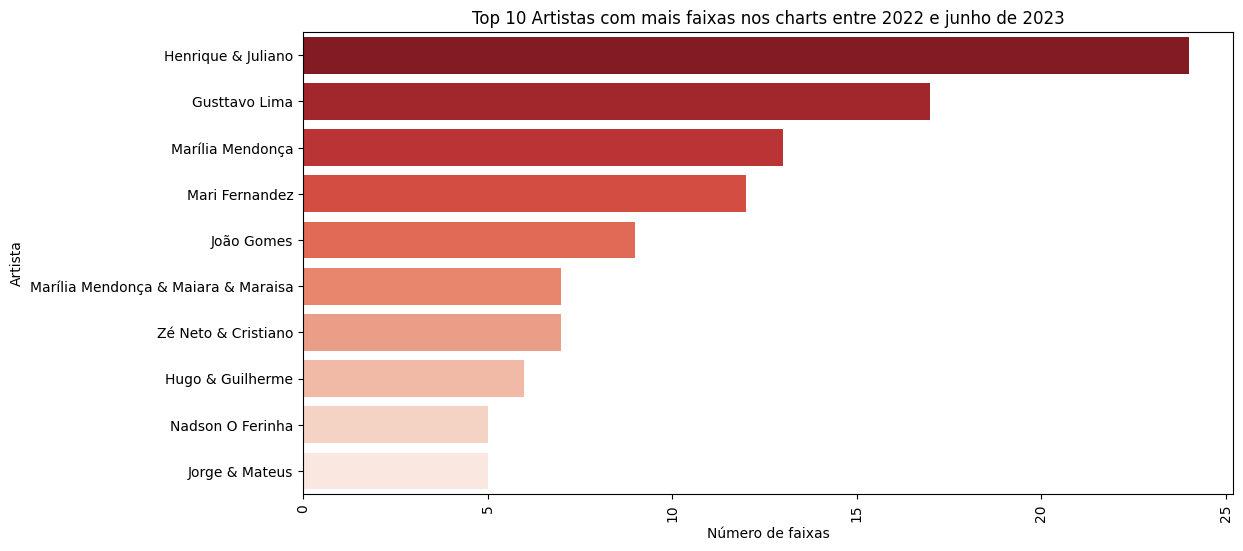

In [275]:
top_10 = artist_tracks
plt.figure(figsize=(12,6))
barplot = sns.barplot(y=top_10.index, x=top_10.values, palette='Reds_r')
plt.title('Top 10 Artistas com mais faixas nos charts entre 2022 e junho de 2023')
plt.ylabel('Artista')
plt.xlabel('Número de faixas')
plt.xticks(rotation=90)

plt.show()

Salvando para facilitar visualizações no tableau.

In [249]:
df.to_excel('../output/refined_for_tableau/top_10_artists_by_track.xlsx', index=False)

## B) Qual a posição mais alta que uma faixa atingiu na semana de seu lançamento? E qual foi a faixa?

Se atingiu top 100 na semana de lançamento, `weeks_on_chart` = 1

In [250]:
# filtering
df_first_week = df[df['weeks_on_chart'] == 1]

# searching for a match where publish_date is between week_open and week_close
df_first_week_release = (
    df_first_week[
        (df_first_week['publish_date'] >= df_first_week['week_open']) &
        (df_first_week['publish_date'] <= df_first_week['week_close'])
    ]
)
highest_position = df_first_week_release['rank'].min()

# Get the track information
track_info = df_first_week_release[df_first_week_release['rank'] == highest_position].sort_values(by='views', ascending=False)
track_info

,rank,previous_rank,track_name,artist_names,weeks_on_chart,views,weekly_growth,week_ref,week_open,week_close,publish_date,frontline
3152,1,0,Bandido,Zé Felipe & Mc Mari,1,14393415,0.0,51,2022-06-17,2022-06-23,2022-06-17,True


Bandido, de Zé Felipe e MC Mari, é a resposta da pergunta. Não só responde a pergunta, como é a única atingiu a posição máxima no ranking. Vejamos como ela se compara com as outras nove principais músicas que alcançaram os charts na primeira semana de lançamento.

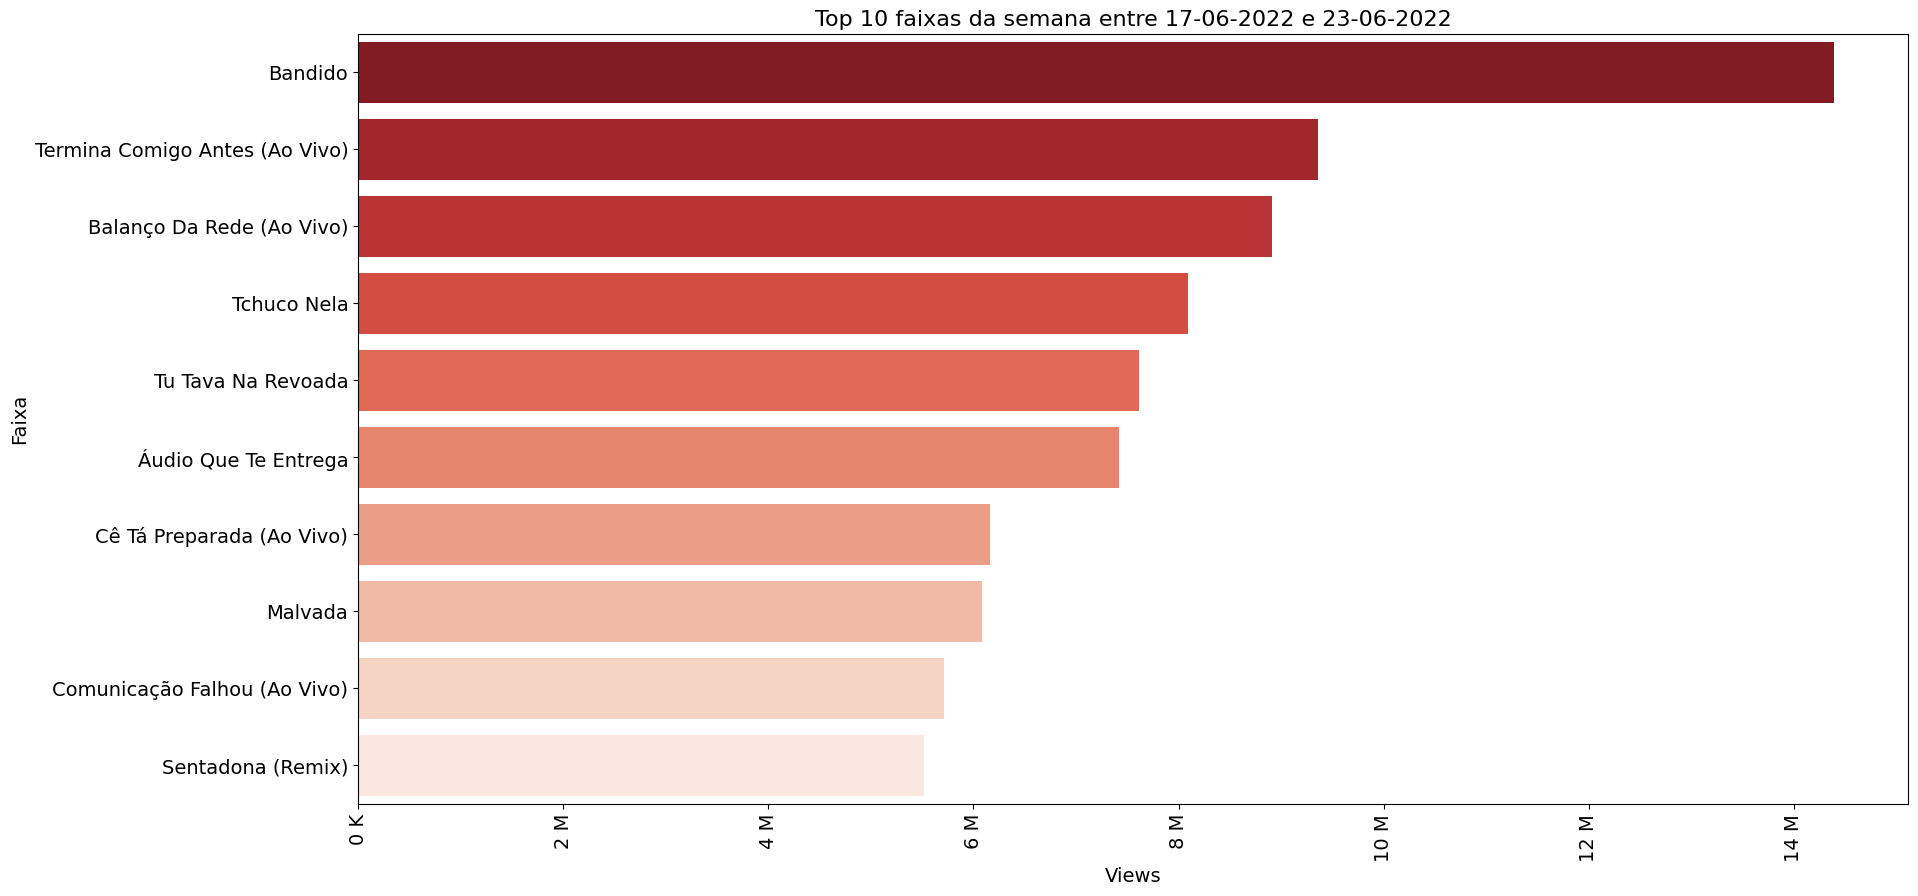

In [251]:
week_ref = track_info["week_ref"].iloc[0]
same_week = df[df["week_ref"] == week_ref]
same_week_tops = same_week.sort_values(by='views', ascending=False).head(10)
start_week = same_week["week_open"].iloc[0]
start_week_str = start_week.strftime('%d-%m-%Y')
end_week = same_week["week_close"].iloc[0]
end_week_str = end_week.strftime('%d-%m-%Y')


plt.figure(figsize=(20, 10))
sns.barplot(y=same_week_tops["track_name"], x=same_week_tops["views"], 
            order=same_week_tops["track_name"], palette='Reds_r')
plt.title(f'Top 10 faixas da semana entre {start_week_str} e {end_week_str}', fontsize=16)
plt.xlabel('Views')
plt.xlabel('Views', fontsize=14)

plt.ylabel('Faixa')
plt.ylabel('Faixa', fontsize=14)

plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f} M' if x >= 1e6 else f'{x/1e3:.0f} K'))

plt.show()

In [252]:
first_place_views = same_week_tops.iloc[0]["views"]
second_place_views = same_week_tops.iloc[1]["views"]
difference = first_place_views - second_place_views

# Format the difference with commas for thousands separators
formatted_difference = "{:,}".format(difference)

print("Diferença de views entre primeiro e segundo lugar é de:", formatted_difference, "visualizações")


Diferença de views entre primeiro e segundo lugar é de: 5,028,713 visualizações


In [253]:
# add a new column 'released_in_first_week'
df['released_in_first_week'] = ((df['weeks_on_chart'] == 1) & 
                                (df['publish_date'] >= df['week_open']) & 
                                (df['publish_date'] <= df['week_close']))

# save to a new CSV file
df.to_excel('../output/refined_for_tableau/refined_with_first_week_release.xlsx', index=False)


## C) Qual o ano teve o maior número de views no chart? E qual foi sua taxa de crescimento em relação ao ano anterior?

In [254]:
yearly_views_dict = {}

yearly_views = df.groupby(df['week_close'].dt.year)['views'].sum()

for year, views in yearly_views.items():
    yearly_views_dict[year] = views
    print("Total views for", year, ":", views)

Total views for 2022 : 15391341346
Total views for 2023 : 7780111011


Entretando, há um problema com essa análise, como veremos:

In [255]:
df_2022 = df[df['week_open'].dt.year == 2022].copy()
df_2023 = df[df['week_open'].dt.year == 2023].copy()

# extracting the months from both dataframes and counting how many months they cover
df_2022.loc[:, 'month'] = df_2022['week_open'].dt.month
df_2023.loc[:, 'month'] = df_2023['week_open'].dt.month

print("Número de meses cobertos em 2022", len(df_2022['month'].unique()))
print("Número de meses cobertos em 2023", len(df_2023['month'].unique()))

# saving for later
months_2022 = len(df_2022["month"].unique())
months_2023 = len(df_2023["month"].unique())

Número de meses cobertos em 2022 11
Número de meses cobertos em 2023 6


Temos duas opções para solucionar essa questão. O espaço amostral de 2022 é certamente maior que o de 2023, o que justifica o maior número de visualizações em disparado.

O ideal, portanto, seria calcular em um espaço amostral igual.

Selecionaremos o espaço amostral por meio de código ao invés de manualmente::


In [256]:
df_2022 = df[df['week_open'].dt.year == 2022]
df_2023 = df[df['week_open'].dt.year == 2023]

start_week_2022 = df_2022['week_open'].dt.isocalendar().week.min()
end_week_2022 = df_2022['week_close'].dt.isocalendar().week.max()

start_week_2023 = df_2023['week_open'].dt.isocalendar().week.min()
end_week_2023 = df_2023['week_close'].dt.isocalendar().week.max()

print(f"2022 Semana inicial: {start_week_2022}, Semana final: {end_week_2022}")
print(f"2023 Semana inicial: {start_week_2023}, Semana final: {end_week_2023}")

start_week = max(start_week_2022, start_week_2023)
end_week = min(end_week_2022, end_week_2023)

print(f"Semana inicial comum: {start_week}, \n Semana final comum: {end_week}")


2022 Semana inicial: 5, Semana final: 52
2023 Semana inicial: 1, Semana final: 24
Semana inicial comum: 5, 
 Semana final comum: 24


Dessa maneira, teremos um espaço amostral equilibrado

In [257]:
# filtering dataframes
df_2022_filtered = df_2022[(df_2022['week_open'].dt.isocalendar().week >= start_week) 
                           & (df_2022['week_close'].dt.isocalendar().week <= end_week)]
df_2023_filtered = df_2023[(df_2023['week_open'].dt.isocalendar().week >= start_week) 
                           & (df_2023['week_close'].dt.isocalendar().week <= end_week)]

# comparing sum of views for the same period
sum_views_2022 = df_2022_filtered['views'].sum()
sum_views_2023 = df_2023_filtered['views'].sum()

growth_rate = ((sum_views_2023 - sum_views_2022) / sum_views_2022) * 100

print(f"Soma de visualizações de 2022 para o mesmo período: {sum_views_2022}")
print(f"Soma de visualizações de 2023 para o mesmo período: {sum_views_2023}")
print(f"Taxa de crescimento: {growth_rate:.2f}%")

Soma de visualizações de 2022 para o mesmo período: 6899863664
Soma de visualizações de 2023 para o mesmo período: 6114336749
Taxa de crescimento: -11.38%


Outra forma seria calcular a média de views por mês

In [258]:
avg_2022 = yearly_views_dict[2022]/months_2022
avg_2023 = yearly_views_dict[2023]/months_2023
print(f"views em 2022: {yearly_views_dict[2022]:,.0f}")
print(f"views em 2023: {yearly_views_dict[2023]:,.0f}")
print(f"média de views por mês em 2022: {avg_2022:,.0f}")
print(f"média de views por mês em 2023: {avg_2023:,.0f}")

views em 2022: 15,391,341,346
views em 2023: 7,780,111,011
média de views por mês em 2022: 1,399,212,850
média de views por mês em 2023: 1,296,685,168


In [277]:
# adjusting because 2023 actually has 5,5 months
avg_2023 = yearly_views_dict[2023]/5.5
print(f"média de views por mês em 2023 corrigida: {avg_2023:,.0f}")


média de views por mês em 2023: 1,414,565,638


In [278]:
growth_rate = ((avg_2023 - avg_2022) / yearly_views_dict[2022]) * 100

print(f"Nesse caso, a taxa de crescimento é de {growth_rate:.2f}%")

Nesse caso, a taxa de crescimento é de 0.10%


In [280]:
data_of_interest = {'Year': [2022, 2023],
        'same_months': [6899863664, 6111178268],
        'avg': [avg_2022, avg_2023]}

views_comparison = pd.DataFrame(data_of_interest)
views_comparison.to_excel('../output/refined_for_tableau/yearly_data.xlsx', index=False)

## D) Existe alguma tendência de crescimento ou queda do frontline no chart ao longo dos anos?

In [261]:
df["frontline"].value_counts()

True     6789
False     231
Name: frontline, dtype: int64

Esse se trata de um problema de regressão. Entretando, por insegurança em se tratando de um dataset com categorias desbalanceadas e falta de tempo para desenvolver o estudo, realizaremos uma análise visual. Criaremos gráficos de linhas mensais e semanais, posteriormente plotando uma linha de regressão por meio da biblioteca `seaborn`.

Para tal, calcularemos a média de frontlines nos charts por semana, visto que por ano o espaço amostral seria binário e insignificante.

In [262]:
df['frontline'] = df['frontline'].astype(int)  # Convert boolean to int for calculation
frontline_per_week = df.groupby(df['week_open'].dt.to_period('W'))['frontline'].mean()


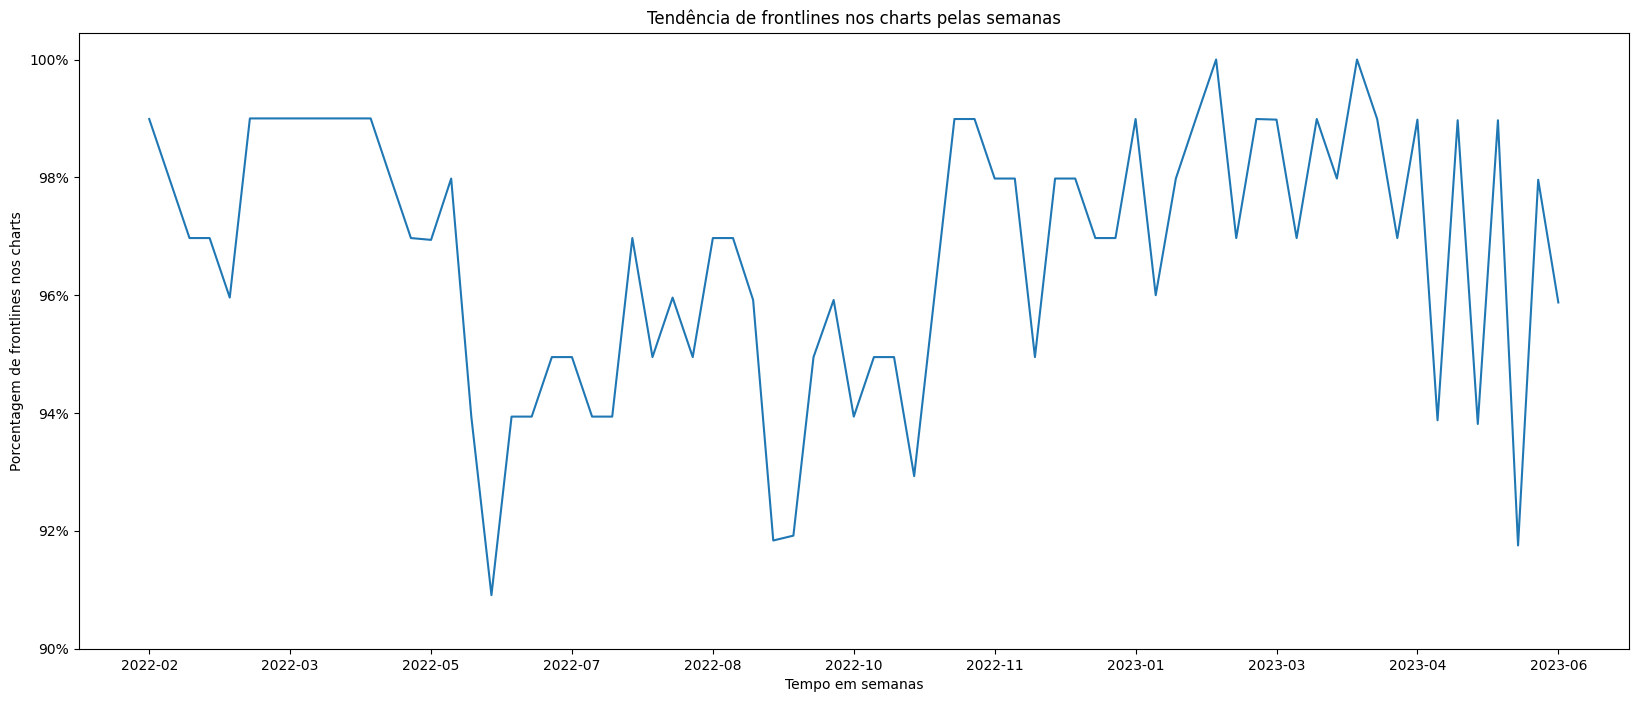

In [263]:
total_weeks = len(frontline_per_week)
num_ticks = 10
step = max(1, total_weeks // num_ticks)

x_ticks_pos = list(range(0, total_weeks, step))
x_tick_labels = [frontline_per_week.index[pos].strftime('%Y-%m') for pos in x_ticks_pos]

plt.figure(figsize=(20, 8))
sns.lineplot(x=frontline_per_week.index.astype(str), y=frontline_per_week.values)
plt.xticks(x_ticks_pos, x_tick_labels)
plt.yticks([0.90, 0.92, 0.94, 0.96, 0.98, 1], ["90%", '92%', '94%', '96%', '98%',
                                                '100%'])
plt.xlabel('Tempo em semanas')
plt.ylabel('Porcentagem de frontlines nos charts')
plt.title('Tendência de frontlines nos charts pelas semanas')
plt.show()

Apesar da variação dentro do espaço demonstrado, o gráfico de linha do gráfico semanal  não mostra uma tendência clara. Vale dizer que este gráfico está restrito ao espaço em que a linha se movimenta, com eixo y no mínimo de 90%. Optamos por visualizar desse jeito nesse momento pois a ideia é medir se há o desenho de uma tendência. E, em dados semanais, não há.

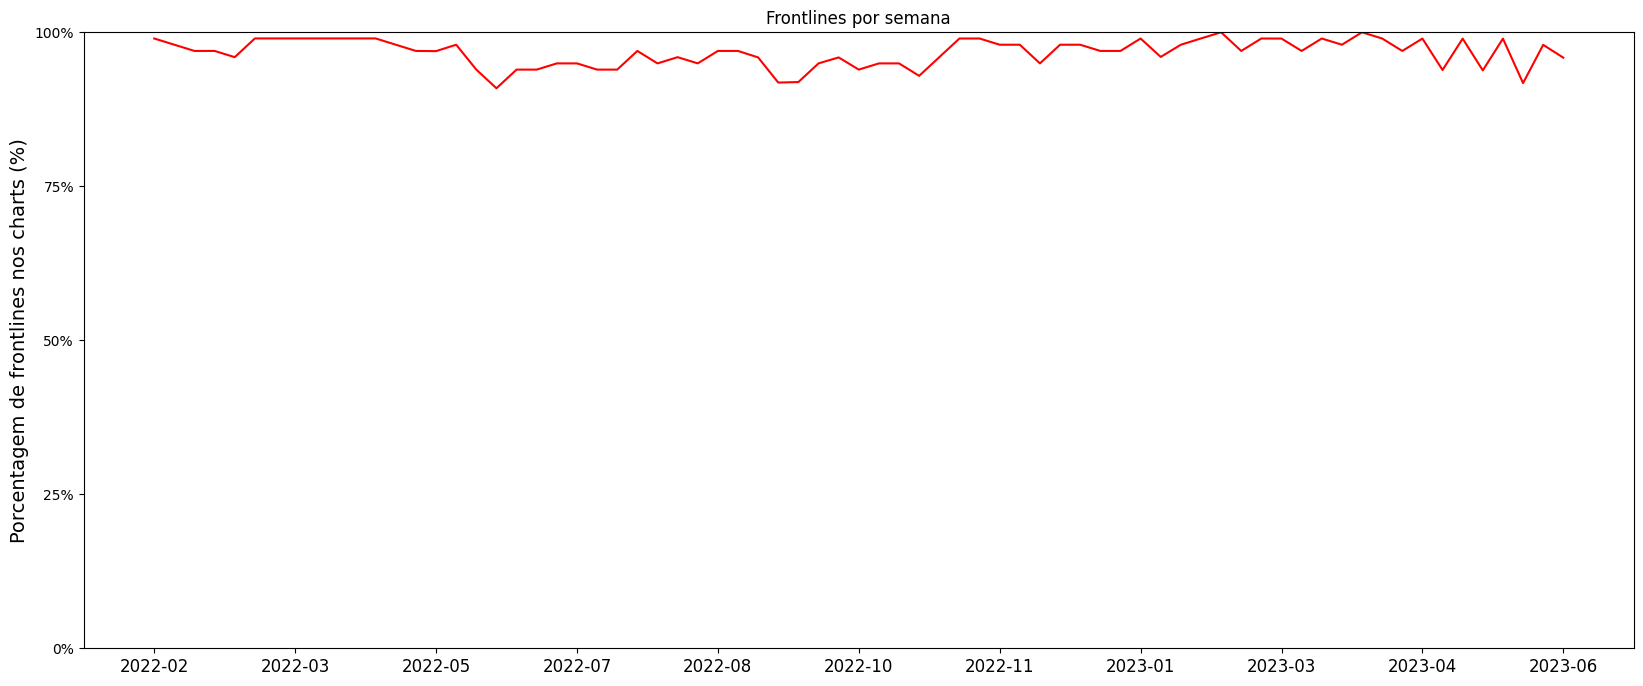

In [264]:
total_weeks = len(frontline_per_week)
num_ticks = 10
step = max(1, total_weeks // num_ticks)

x_ticks_pos = list(range(0, total_weeks, step))
x_tick_labels = [frontline_per_week.index[pos].strftime('%Y-%m') for pos in x_ticks_pos]

plt.figure(figsize=(20, 8))
sns.lineplot(x=range(total_weeks), y=frontline_per_week.values, color="r")
plt.xticks(x_ticks_pos, x_tick_labels, fontsize=12) 
plt.ylabel('Porcentagem de frontlines nos charts (%)', fontsize=14) 
plt.title('Frontlines por semana')
plt.ylim(0, 1)
plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0%', '25%', '50%', '75%', '100%'])
plt.show()

Apesar da variação ser significativa em termos percentuais, em termos absolutos não é, como se vê no chart acima com o eixo y corrigido.

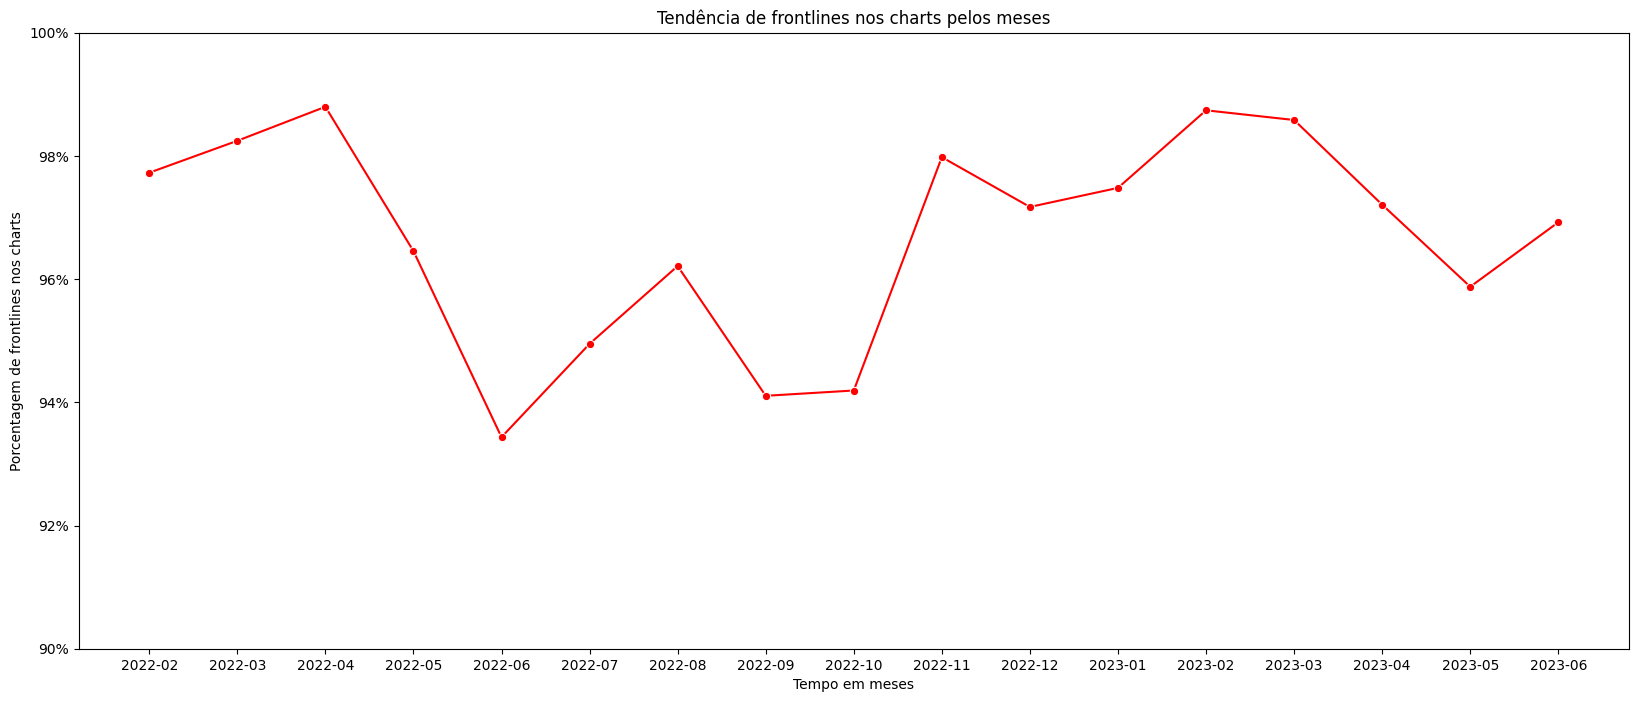

In [265]:
df['frontline'] = df['frontline'].astype(int)  # Convert boolean to int for calculation
frontline_per_month = df.groupby(df['week_open'].dt.to_period('M'))['frontline'].mean()

total_months = len(frontline_per_month)
num_ticks = 10
step = max(1, total_months // num_ticks)

x_ticks_pos = list(range(0, total_months, step))
x_tick_labels = [frontline_per_month.index[pos].strftime('%Y-%m') for pos in x_ticks_pos]

plt.figure(figsize=(20, 8))
sns.lineplot(x=np.arange(total_months), y=frontline_per_month.values, color='red', marker='o', markersize=6)
plt.xticks(x_ticks_pos, x_tick_labels)
plt.yticks([0.90, 0.92, 0.94, 0.96, 0.98, 1], ["90%", '92%', '94%', '96%', '98%', '100%'])
plt.xlabel('Tempo em meses')
plt.ylabel('Porcentagem de frontlines nos charts')
plt.title('Tendência de frontlines nos charts pelos meses')
plt.show()


No gráfico acima, que mostram dados agregados mensalmente, também não conseguimos visualizar uma tendência clara. Vamos tentar com uma linha de regressão.

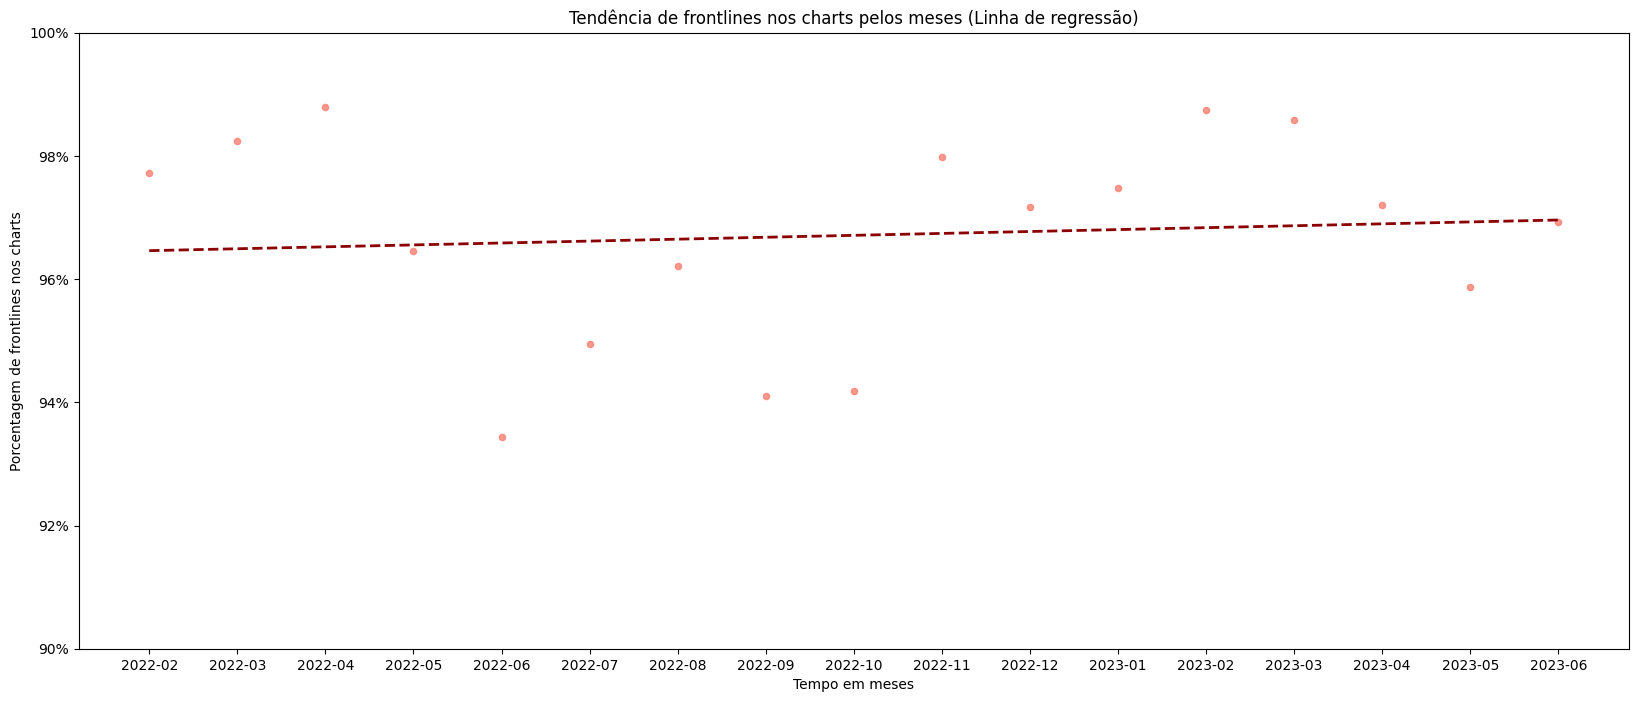

In [266]:
plt.figure(figsize=(20, 8))
sns.regplot(x=np.arange(total_months), y=frontline_per_month.values, scatter_kws={"color": "salmon", "s": 20}, 
            line_kws={"color": "darkred", "lw": 2,"ls": "--" }, ci=None)
plt.xticks(x_ticks_pos, x_tick_labels)
plt.yticks([0.90, 0.92, 0.94, 0.96, 0.98, 1], ["90%", '92%', '94%', '96%', '98%', '100%'])
plt.xlabel('Tempo em meses')
plt.ylabel('Porcentagem de frontlines nos charts')
plt.title('Tendência de frontlines nos charts pelos meses (Linha de regressão)')
plt.show()


A linha de regressão está levemente inclinada para cima. Reiteramos que, fosse o gráfico iniciado com eixo y no zero, a inclinação seria quase imperceptível.

## E) Nossa impressão é que o tempo que as faixas permanecem no chart está diminuindo e com isso, mais faixas diferentes estão passando pelo chart. Com os dados extraídos, é possível comprovar essa afirmativa?

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7020 entries, 0 to 7019
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   rank                    7020 non-null   int64         
 1   previous_rank           7020 non-null   int64         
 2   track_name              7020 non-null   object        
 3   artist_names            7020 non-null   object        
 4   weeks_on_chart          7020 non-null   int64         
 5   views                   7020 non-null   int64         
 6   weekly_growth           7020 non-null   float64       
 7   week_ref                7020 non-null   int64         
 8   week_open               7020 non-null   datetime64[ns]
 9   week_close              7020 non-null   datetime64[ns]
 10  publish_date            7020 non-null   datetime64[ns]
 11  frontline               7020 non-null   int32         
 12  released_in_first_week  7020 non-null   bool    

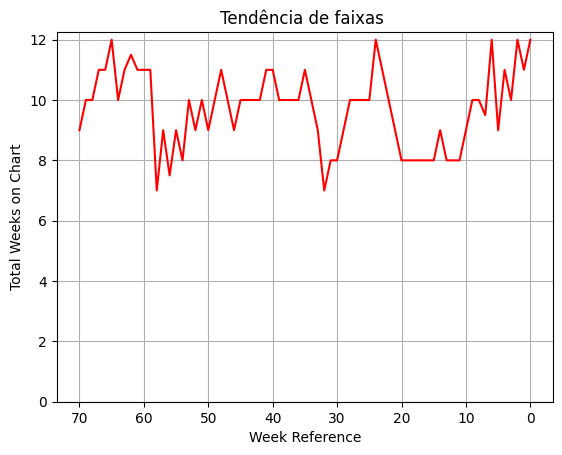

In [268]:
weeks_on_chart_agg = df.groupby('week_ref')['weeks_on_chart'].median()

plt.plot(weeks_on_chart_agg.index,weeks_on_chart_agg.values, color="r")
plt.xlabel('Week Reference')
plt.ylabel('Total Weeks on Chart')
plt.title('Tendência de faixas ')
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.ylim(0)
plt.grid(True)
plt.show()


O gráfico acima parace terminar com uma leve tendência de alta, mas a verdade é que não podemos tirar grandes conclusões visualmente.
Obs: Vale lembrar que a coluna `weef_ref` guarda valores `integers` em que zero significa **mais próximo de hoje**, enquanto que, quanto maior o número, **mais distante de hoje**. Por isso a inversão do eixo `x` no gráfixo. A seguir, vamos plotar uma linha de regressão para visualizar alguma tendência, se ela existir.

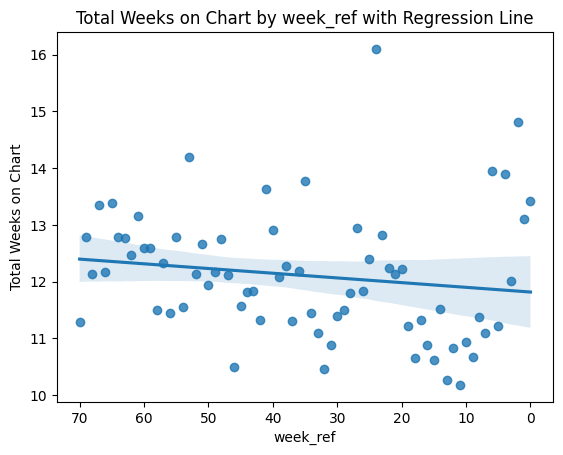

In [269]:
reg_plot_df = pd.DataFrame({'week_ref': weeks_on_chart_agg.index, 'weeks_on_chart': weeks_on_chart_agg.values})

# Plot the scatter plot with a regression line
sns.regplot(x='week_ref', y='weeks_on_chart', data=new_df)
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.xlabel('week_ref')
plt.ylabel('Total Weeks on Chart')
plt.title('Total Weeks on Chart by week_ref with Regression Line')
plt.show()


O gráfico acima mostra que, possivelmente, algum outlier puxou a linha do gráfico anterior para cima, pois a linha de regressão aponta para baixo. Entretando, visualmente é complicado dar certezas. O ideal seria aplicar um teste estatístico. Vamos verificar a distribuição das variáveis.

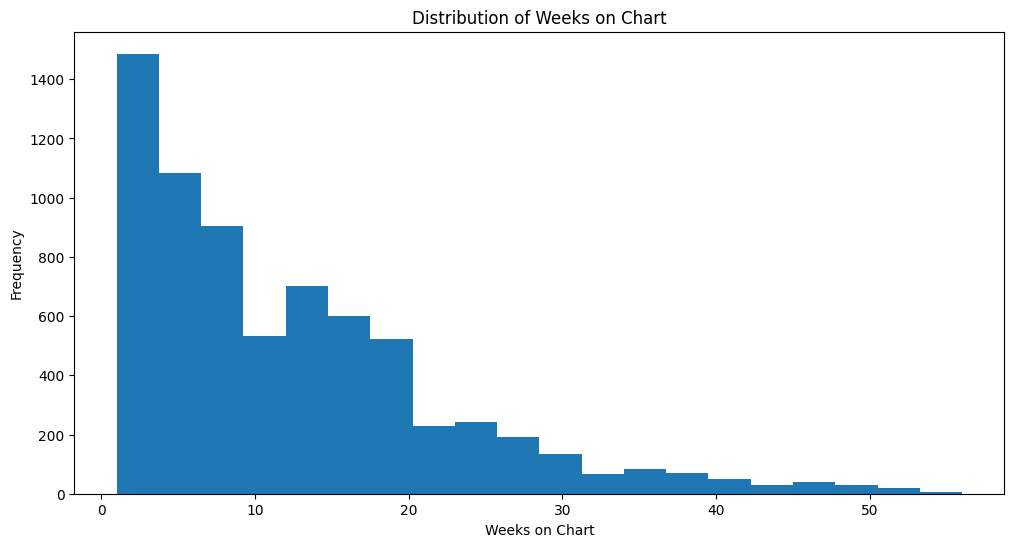

In [270]:
plt.figure(figsize=(12, 6))
plt.hist(df['weeks_on_chart'], bins=20, edgecolor='none')  # Adjust the number of bins as needed
plt.title('Distribution of Weeks on Chart')
plt.xlabel('Weeks on Chart')
plt.ylabel('Frequency')
plt.show()


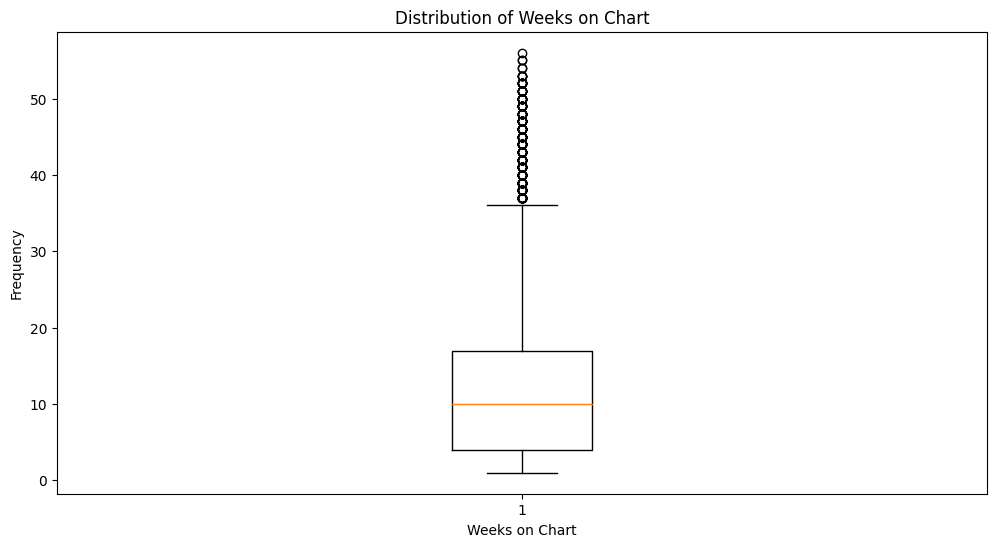

In [271]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['weeks_on_chart'])
plt.title('Distribution of Weeks on Chart')
plt.xlabel('Weeks on Chart')
plt.ylabel('Frequency')
plt.show()

Temos uma distribuição assimétrica à direita (ou uma assimetria positiva), com maior concentração da frequência de dados quanto menor o valor e alguns outliers acima da faixa de 37. Portanto, o ideal seria um teste não-paramétrico. Pesquisando, encontrei o teste de Mann-Kendall. O teste de Mann-Kendall é um teste que tem como objetivo identificar tendências numa base de dados. Além de lidar bem com distribuição que não seguem a normal, também é resiliente a outliers. Dessa maneira, poderemos verificar se, estatisticamente, existe alguma tendência nos dados, para além da visualização. 

Para o teste ter sucesso, é importante que os dados estejam ordenados cronologicamente. No caso em questão, ordenaremos inversamente, visto que `week_ref` está em ordem inversamente cronológica.

In [272]:
import pymannkendall as mk

# Calculate the mean 'weeks_on_chart' for each 'week_ref'
average_weeks = df.groupby('week_ref')['weeks_on_chart'].mean().reset_index().sort_values("week_ref", ascending=False)

# Conduct the Mann-Kendall test
result = mk.original_test(average_weeks['weeks_on_chart'])

print(result)


Mann_Kendall_Test(trend='decreasing', h=True, p=0.015208965666985375, z=-2.427364530231983, Tau=-0.19718309859154928, s=-490.0, var_s=40583.333333333336, slope=-0.01648059542796385, intercept=12.687931951089846)


Leitura dos resultados:
- o `p-value` abaixo de 0.05 indica significância estatística. O "True" em `h` reforça nossa leitura. O `p-value` de 0.015 sugere que a tendência observada é improvável de se reproduzir somente pelo acaso.

- o `z-value`, junto com a resposta no início da tupla, indica uma tendência **de queda**, o que é reforçado pelo `Tau` e `s` e `slope` de valores negativos. 


Existe uma questão a ser levada em conta, porém: **o teste de Mann-Kendall pressupõe que as variáveis são independentes**. Entretanto, a reprodução de uma faixa em uma plataforma recheada de sistemas de recomendação automatizados pode ser considerada independente? Isso seria algo a ser discutido com a equipe e com o business para melhor orientação.

Apostando em uma técnica mais simples de estatística descritiva. Utilizaremos a mediana devido a existência de outliers.

In [273]:
# Create a new column for the semester number
df['semester_number'] = ((df['week_open'] - df['week_open'].min()).dt.days // (30*6))

# Group by semester and track name, then find the maximum number of weeks each track stays on the chart in each semester
tracks_semester = df.groupby(['semester_number', 'track_name'])['weeks_on_chart'].max()

# Now group by semester and find the average number of weeks tracks stay on the chart
avg_weeks_per_semester = tracks_semester.groupby('semester_number').mean()

print('Average number of weeks each track stays on the chart per semester:')
print(avg_weeks_per_semester)

Average number of weeks each track stays on the chart per semester:
semester_number
0    13.005479
1    12.770588
2    12.917857
Name: weeks_on_chart, dtype: float64


Olhando dados semestrais, não há, também, disparidades conclusivas. Portanto, levando em consideração a contraditoriedade das análises realizadas aqui, sustentaríamos que os dados são inconclusivos. Existem respostas estatísticas para ambas perspectivas.

In [274]:
# Assuming df is your DataFrame and it has columns 'week_ref' and 'weeks_on_chart'
df_grouped = df.groupby('week_ref')['weeks_on_chart'].mean().reset_index()

# Make sure data is sorted by 'week_ref' in ascending order
df_grouped.sort_values(by='week_ref', inplace=True)

# Save the DataFrame to an Excel file
df_grouped.to_excel('../output/refined_for_tableau/cleaned_data.xlsx', index=False)